Number of Labels = 51865
Van: 2914
Car: 28742
Misc: 973
DontCare: 11295
Truck: 1094
Pedestrian: 4487
Cyclist: 1627
Tram: 511
Person_sitting: 222
Number of not truncated car = 24675 (85.85%)
1: 8184  (28.47%)
0: 13457  (46.82%)
3: 928  (3.23%)
2: 6173  (21.48%)


(array([430., 357., 313., 291., 310., 317., 351., 375., 437., 886.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <BarContainer object of 10 artists>)

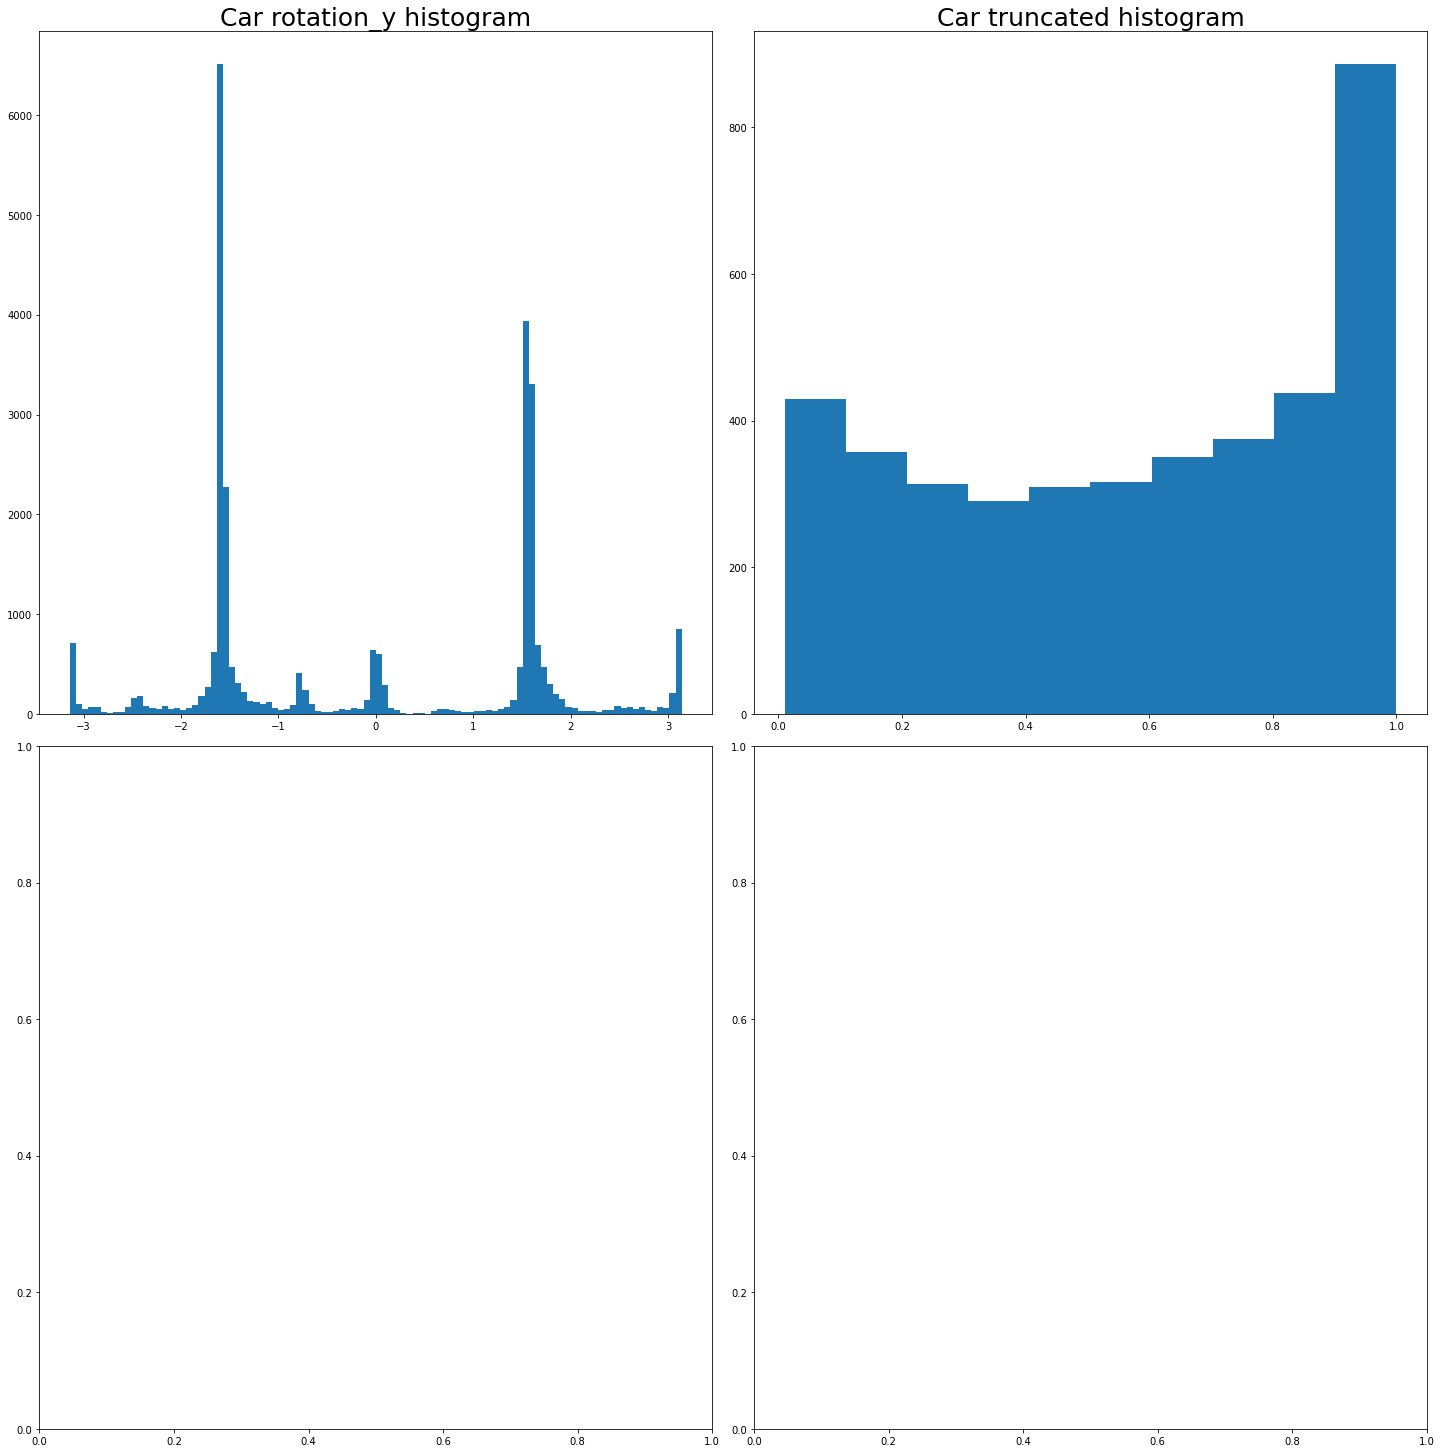

In [1]:
LABEL_DIR = "/home/lab530/KenYu/visualDet3D/kitti/training/label_2/"

import glob 
fns = glob.glob(LABEL_DIR + "*.txt")
all_det = []
for fn in fns: 
    with open(fn, 'r') as f:
        all_det += f.readlines()
print(f"Number of Labels = {len(all_det)}")

# Print class
from collections import defaultdict
cls_dict = defaultdict(int)
for det in all_det:
    cls = det.split(" ")[0]
    cls_dict[cls] += 1
for cls in cls_dict:
    print(f"{cls}: {cls_dict[cls]}")
print("=====================================")

# 
N_BIN = 10
x_trun = []
non_trun = 0
for det in all_det:
    cls = det.split(" ")[0]
    truncated = float(det.split(" ")[1])
    if cls == "Car":
        if truncated == 0.0:
            non_trun += 1
        else:
            x_trun.append(truncated)
print(f"Number of not truncated car = {non_trun} ({round(100*non_trun/cls_dict['Car'],2)}%)")
print("=====================================")

occ_dict = defaultdict(int)
for det in all_det:
    cls = det.split(" ")[0]
    occluded = int(det.split(" ")[2])
    if cls == "Car":
        occ_dict[occluded] += 1
for i in occ_dict:
    print(f"{i}: {occ_dict[i]}  ({round(100*occ_dict[i]/cls_dict['Car'],2)}%)")
print("=====================================")

# Show rotation_y histogram
N_BIN = 100
import matplotlib.pyplot as plt
x = []
for det in all_det:
    cls = det.split(" ")[0]
    t = float(det.split(" ")[-1])
    if cls == 'Car': # -10 means don't care 
        x.append(t)

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.set_facecolor('white')
fig.tight_layout()

ax[0, 0].set_title("Car rotation_y histogram", fontsize=25)
ax[0, 0].hist(x, bins=N_BIN)
ax[0, 1].set_title("Car truncated histogram", fontsize=25)
ax[0, 1].hist(x_trun, bins=10)
# ax[1, 0].set_title("Car occluded histogram", fontsize=25)
# ax[1, 0].hist(x_occlude, bins=N_BIN)

